<a href="https://colab.research.google.com/github/zoefalomir/HCAI-ML_seminar/blob/main/ML_examples_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal

To practice regression methods. Additionally, to get familiar with the libraries of pandas (e.g., DataFrame), sklearn (e.g., linear regression), numpy, and matplotlib.
Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

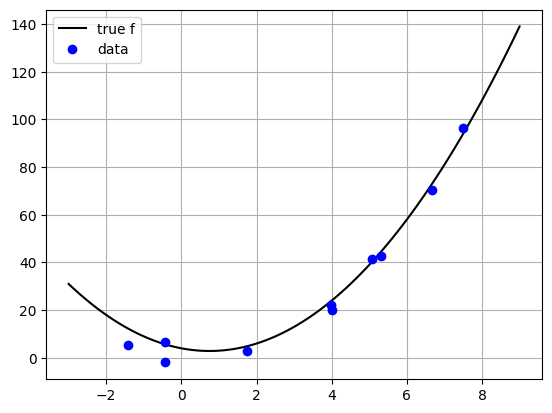

In [ ]:
# create toy data (uniform distributed)
N = 10
np.random.seed(42)
X = np.random.uniform(-2, 8, N).reshape(-1, 1)
def true_f(x):
    return 2*x**2-3*x+4
y = true_f(X) + np.random.normal(0.0, 4.0, N).reshape(-1, 1)

# show toy data
dom = np.linspace(-3, 9, 100).reshape(-1, 1)
fig, ax = plt.subplots()
ax.grid()
ax.plot(dom, true_f(dom), color='black', linestyle='-', label='true f')
ax.plot(X, y, color='blue', marker='o', linestyle='', label='data')
ax.legend()

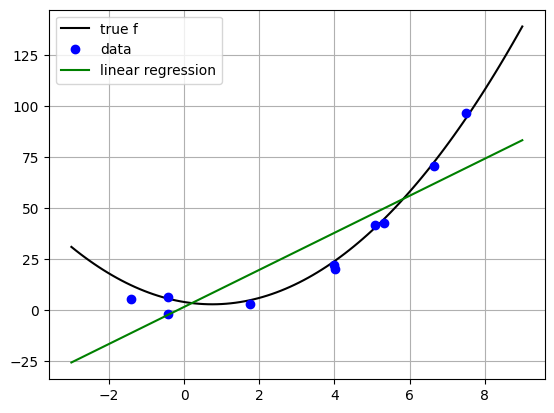

In [ ]:
#Import the Linear Regression and the Penalty
from sklearn.linear_model import LinearRegression, Ridge
# Defining the model you want to use for linear regression, but at this point, the model hasn’t been trained yet. It’s like setting up an empty template.
lr = LinearRegression()

# Fit the model to training data. After this step, reg will hold the trained model, which can then be used to make predictions.
reg = lr.fit(X, y)

fig, ax = plt.subplots()
ax.grid()
ax.plot(dom, true_f(dom), color='black', linestyle='-', label='true f')
ax.plot(X, y, color='blue', marker='o', linestyle='', label='data')
ax.plot(dom, reg.predict(dom), color='green', linestyle='-', label='linear regression')
ax.legend()

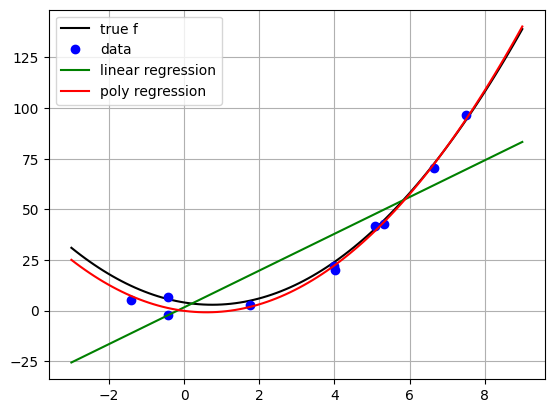

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Create a PolynomialFeatures object to generate polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
# Fit the model to training data
X_poly = poly.fit_transform(X)
# Transform the original features in 'dom' to include polynomial features up to degree 2
dom_poly = poly.transform(dom)

# Create a Ridge regression model with regularization strength alpha set to 10.0
pr = Ridge(alpha=0.0)
# Fit the Ridge regression model to the polynomial features X_poly and target values y
reg_poly = pr.fit(X_poly, y)

fig, ax = plt.subplots()
ax.grid()
ax.plot(dom, true_f(dom), color='black', linestyle='-', label='true f')
ax.plot(X, y, color='blue', marker='o', linestyle='', label='data')
ax.plot(dom, reg.predict(dom), color='green', linestyle='-', label='linear regression')
ax.plot(dom, reg_poly.predict(dom_poly), color='red', linestyle='-', label='poly regression')
ax.legend()

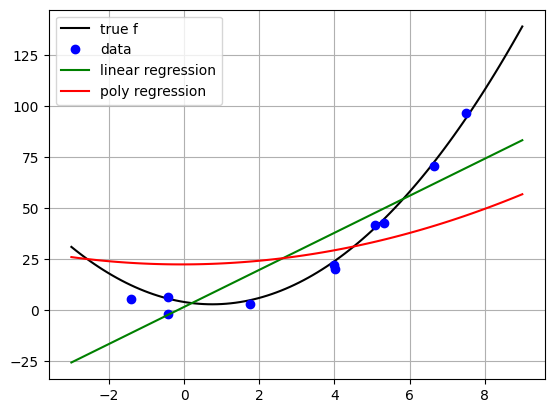

In [ ]:
# Create a Ridge regression model with regularization strength alpha very big
pr = Ridge(alpha=1e4)
reg_poly = pr.fit(X_poly, y)

fig, ax = plt.subplots()
ax.grid()
ax.plot(dom, true_f(dom), color='black', linestyle='-', label='true f')
ax.plot(X, y, color='blue', marker='o', linestyle='', label='data')
ax.plot(dom, reg.predict(dom), color='green', linestyle='-', label='linear regression')
ax.plot(dom, reg_poly.predict(dom_poly), color='red', linestyle='-', label='poly regression')
ax.legend()

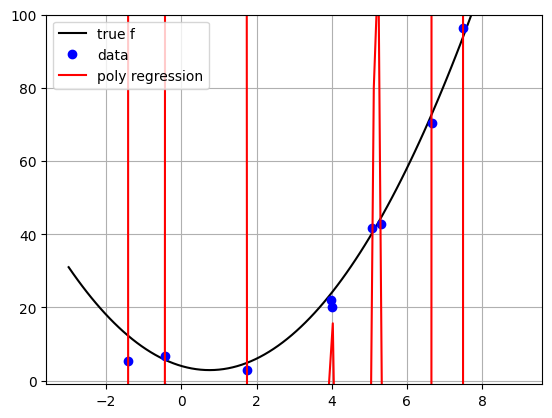

In [ ]:
# Overfitting
poly = PolynomialFeatures(degree=N+1)
X_poly = poly.fit_transform(X)
dom_poly = poly.transform(dom)
lr_poly = lr.fit(X_poly, y)

fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-1,100)
ax.plot(dom, true_f(dom), color='black', linestyle='-', label='true f')
ax.plot(X, y, color='blue', marker='o', linestyle='', label='data')
ax.plot(dom, lr_poly.predict(dom_poly), color='red', linestyle='-', label='poly regression')
ax.legend()

**Goal**

To get familar with different classification algorithms (Logistic Regression, SVM, KNN) on the same task.

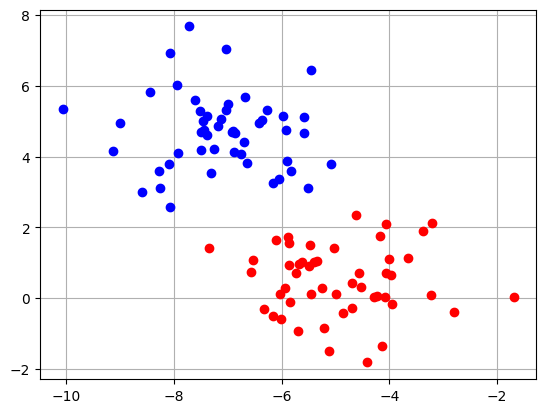

In [ ]:
# create toy data
from sklearn.datasets import make_blobs
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=3)
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=12)

fig, ax = plt.subplots()
ax.grid()
ax.plot(X[y==0,0], X[y==0,1], color='blue', marker='o', linestyle='')
ax.plot(X[y==1,0], X[y==1,1], color='red', marker='o', linestyle='')

In [ ]:
# Import the different methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Create a Logistic Regression model without regularization
logreg = LogisticRegression(penalty=None)

# Fit the Logistic Regression model to the data
logreg.fit(X, y)

# Create a Linear Support Vector Classifier with regularization parameter C set to 1.0
svm = LinearSVC(C=1.0)

# Fit the Linear SVC model to the data
svm.fit(X, y)

# Create a K-Nearest Neighbors classifier with 1 neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN model with 1 neighbor to the data
knn1.fit(X, y)

# Create a K-Nearest Neighbors classifier with 3 neighbors
knn2 = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model with 3 neighbors to the data
knn2.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

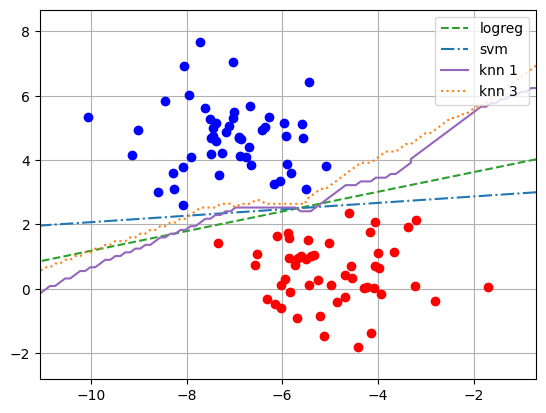

In [ ]:
# Plotting the decision boundaries of different classifiers along with the data points
fig, ax = plt.subplots()
ax.grid()
ax.plot(X[y==0,0], X[y==0,1], color='blue', marker='o', linestyle='')
ax.plot(X[y==1,0], X[y==1,1], color='red', marker='o', linestyle='')
DecisionBoundaryDisplay.from_estimator(logreg, X, ax=ax, colors='tab:green',
                                       alpha=1.0, linestyles='--',
                                       plot_method='contour', levels=[0])
DecisionBoundaryDisplay.from_estimator(svm, X, ax=ax, colors='tab:blue',
                                       alpha=1.0, linestyles='-.',
                                       plot_method='contour', levels=[0])
DecisionBoundaryDisplay.from_estimator(knn1, X, ax=ax, colors='tab:purple',
                                       alpha=1.0, linestyles='-',
                                       plot_method='contour', levels=[0])
DecisionBoundaryDisplay.from_estimator(knn2, X, ax=ax, colors='tab:orange',
                                       alpha=1.0, linestyles=':',
                                       plot_method='contour', levels=[0])
ax.plot([], [], color='tab:green', linestyle='--', label='logreg')
ax.plot([], [], color='tab:blue', linestyle='-.', label='svm')
ax.plot([], [], color='tab:purple', linestyle='-', label=f'knn {knn1.n_neighbors}')
ax.plot([], [], color='tab:orange', linestyle=':', label=f'knn {knn2.n_neighbors}')
ax.legend()